# Cristhian Wiki


In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify
from scipy.special import comb

## Pregunta 4

In [2]:
xi = np.array([-3, -1, 2, 4])
fi = np.array([0, 4, 3, 1])

# PROCEDIMIENTO
n = len(xi)
x = sp.Symbol('x')
# Polinomio
polinomio = 0
for i in range(0, n, 1):
    # Termino de Lagrange
    termino = 1
    for j  in range(0, n, 1):
        if (j!=i):
            termino = termino*(x-xi[j])/(xi[i]-xi[j])


    print("El L(",i,") es :", termino)
    polinomio = polinomio + termino*fi[i]
# Expande el polinomio
px = polinomio.expand()

# para evaluacion numérica
pxn = sp.lambdify(x, polinomio)

# Puntos para la gráfica
a = np.min(xi)
b = np.max(xi)

muestras = 100
xi_p = np.linspace(a, b, muestras)
fi_p = pxn(xi_p)

# Salida
print('\nPolinomio de Lagrange, expresiones:')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(px)


El L( 0 ) es : (-x/2 - 1/2)*(x - 4)*(x - 2)/35
El L( 1 ) es : (x/2 + 3/2)*(x - 4)*(x - 2)/15
El L( 2 ) es : -(x/5 + 3/5)*(x - 4)*(x + 1)/6
El L( 3 ) es : (x/7 + 3/7)*(x - 2)*(x + 1)/10

Polinomio de Lagrange, expresiones:
(x/7 + 3/7)*(x - 2)*(x + 1)/10 - (x/5 + 3/5)*(x - 4)*(x + 1)/2 + 4*(x/2 + 3/2)*(x - 4)*(x - 2)/15

Polinomio de Lagrange: 
x**3/21 - 13*x**2/35 - 11*x/105 + 151/35


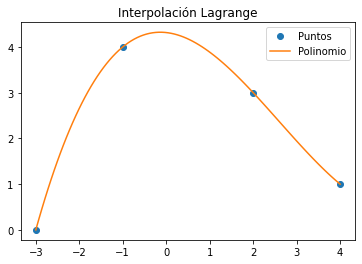

In [3]:
# Gráfica
plt.title('Interpolación Lagrange')
plt.plot(xi, fi, 'o', label = 'Puntos')
plt.plot(xi_p, fi_p, label = 'Polinomio')
plt.legend()
plt.show()

## Pregunta 5

In [31]:
# Bezier curve
def cubic_bezier(t, p):
    return (1 - t)**3*p[0] + 3*(1 - t)**2*t*p[1] + 3*(1 - t)*t**2*p[2] + t**3*p[3]

  

### (a) Parametric description $P(t)$ of the cubic Bezier 

In [33]:
sp.init_printing(use_unicode=True)
P = np.array([[-3, 0], [-1, 4], [2, 3], [4, 1]])
t = sp.symbols('t')
p_t = cubic_bezier(t, P)
print("x(t) =") 
sp.expand(p_t[0])

x(t) =


In [34]:
print("y(t) =")
sp.expand(p_t[1])

y(t) =


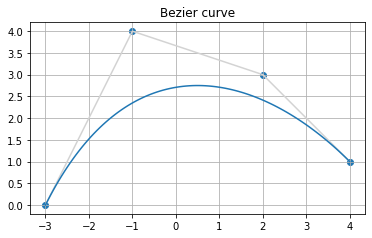

In [35]:
t_interval = np.linspace(0, 1, 100)
x_interval = [-2.0*t**3 + 3.0*t**2 + 6.0*t - 3.0 for t in t_interval]
y_interval = [4.0*t**3 - 15.0*t**2 + 12.0*t for t in t_interval]

plt.title("Bezier curve")
plt.plot(P[:,0], P[:,1], c='lightgray')
plt.plot(x_interval, y_interval)
plt.scatter(P[:,0], P[:,1])
plt.axis("scaled")
plt.grid(True)
plt.show()

### (b) Verify by finding the derivatives that ....

In [39]:
# First derivative
print("Primera derivada\n")
print("t in [0, 1]")

# The method sp.diff converts a sympy object to python function 
dx5_c = sp.diff(-2.0*t**3 + 3.0*t**2 + 6.0*t - 3.0)
dy5_c = sp.diff(4.0*t**3 - 15.0*t**2 + 12.0*t)

print("x1'(t) =", dx5_c)
print("y1'(t) =", dy5_c)
print()
print("x1'(0) =", lambdify(t, dx5_c)(0))
print("y1'(0) =", lambdify(t, dy5_c)(0))
print()
print("x1'(1) =", lambdify(t, dx5_c)(1))
print("y1'(1) =", lambdify(t, dy5_c)(1))

Primera derivada

t in [0, 1]
x1'(t) = -6.0*t**2 + 6.0*t + 6.0
y1'(t) = 12.0*t**2 - 30.0*t + 12.0

x1'(0) = 6.0
y1'(0) = 12.0

x1'(1) = 6.0
y1'(1) = -6.0


### (c) Verify that the slopes match the slopes of the line segments $P_0P_1$ and $P_2P_3$.

In [38]:
print(f"Pendiente P0-P1: {(P[1][1] - P[0][1])/(P[1][0] - P[0][0])}")
print()
print(f"Pendiente P2-P3: {(P[3][1] - P[2][1])/(P[3][0] - P[2][0])}")

Pendiente P0-P1: 2.0

Pendiente P2-P3: -1.0


Se puede observar que:
* 16 / 2 = 2 , lo que coincide con la pendiente P0-P1

* -6 / 6 = -1, lo que coincide con la pendiente P2-P3